In [1]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [2]:
def default_pars( **kwargs):
    pars = {}    
    pars['Pinf'] = 20 #*10^6 units
    
    pars['kpg']    = 0.062 #0.059
    ### simulation parameters ###
    pars['T'] = 3000. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [3]:
def run_sepsis_model(pars):
    # Set parameters
    Pinf = pars['Pinf']
    kpg = pars['kpg']
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    P = np.zeros(Lt) # pathogen levels
    
    P[0]= 1
    for it in range(Lt-1):
        

        dP = (kpg*P[it]*(1-(P[it]/Pinf))) * dt  # Adding a logistic growth term        
        #update
        P[it+1] = P[it] + dP

    return P

In [4]:
pars = default_pars()
P =run_sepsis_model(pars)

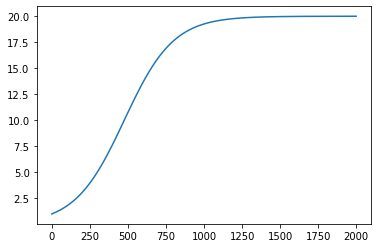

In [5]:
# plt.plot(P)
plt.plot(P[0:2000])

In [6]:
#Fixed points
#P*(1-(P/Pinf))=0 => dp/dt = 0 at P=0 and (1-(P/Pinf))=0 => dp/dt = 0 at P=0 and P=Pinf